# Sahba Salarian 

# Introduction


Banking industry evolves at a rapid pace with new technology innovations, changing consumer dynamics, geopolitical movements and evolving demographics. Currently we are in the midst of and industrial revolution in banking industry which new models and technologies will change the way business is conducted. 

Lots of new fintech firms or bank tech firms have erupted in recent times to target newer groups of consumers who prefer to do things virtually. Some banks have also developed solutions to target thin-file customers. For example, technology can help monitor various alternative sources of information for example on creditworthiness, like ensuring they are paying rent and utilities on time.
    
There are many areas in this evolving industry where Machine Learning can be beneficial. All these potensial areas, require advanced customer's data analysis with high accuracy and prediction capabilities. Among these areas are:

1. Manage portfolios with algorithms: AI and machine learning could streamline the process for developing a portfolio by assessing a customer’s goals and risk tolerance to develop an individualized portfolio.
2. Conduct High-Frequency Trading: Trading has the potential to accelerate at a faster pace when AI and machine learning algorithms are utilized for trading decisions. 
3. Detect Frauds And Threats to Financial Systems: Routine checks of risk factors that could affect customer information can provide an understanding of the potential threats. As a result, the response of initial invasion detection can be quicker, and the security at financial institutions can flag the unusual behavior for monitoring. 
    
In this project, as a step toward fulfilling these ends, advanced data analysis tools are used to predict and identify which customers of Santander bank will make a specific transaction in the future, irrespective of the amount of money transacted. 

The data has been provided by Santander bank as a competition for kagglers on kaggle website. The dataset has 200k observations and 200 column variables for each customer and a class observation defining whether the customer makes a transaction or not. The target is to predict a binary classification response with highest posible accuracy which will be evaluated by comparing the real data from Santander bank and the predicted values for a separate test data set. 

For this project, logistic regression, Decision tree with gradient boosting and K-fold cross validation, Augmented Decision tree with gradient boosting and KNN methods are used and compared. The results from this project were among the top 10 percent accurate predictions for the unseen datasets and has been awarded the Bronze medal in Kaggle website.  

# Data Engineering and Visualization

Data analysis is performed using Python. as mentioned before the dataset has 200k observations with 202 columns, an ID-code, target response of zero/one and 200 features. To prepare the dataset, the ID-codes have been removed from the dataset, unknown variables are chacked and data set is adjusted using *Pandas* library. 



In [183]:


import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)      



In [184]:
df = pd.read_csv('../../data/train.csv')

In [1]:
# print(df.head(3))

In [185]:
df = df.drop(columns=['ID_code'])

In [186]:
df = df.rename(index=str, columns={"target": "y"})

In [111]:
#print(df.head(3))

In [187]:
X = df.iloc[:,1:201]
#print(X)

In [188]:
Y = df.iloc[:,0]
#print(Y)

## Balanced vs. Unbalanced data set

Balanced and unbalanced data set usually behave very differently in terms of the degree of accuracy in classifications. Unbalanced dataset usually require more flexible models, to give a better classification accuracy. To investigate the balance in this dataset, the countplot of the target values which are considered as response "y", are plotted using the *matplot* library. The demonstrated number of observations in the two target classes demonstrate and unbalance dataset, since the number of customers willing to make a future transaction is considerably lower than those who will not make any.

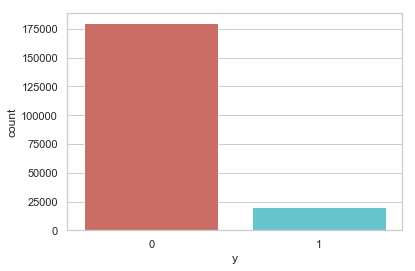

In [116]:
#countplot of the response
sns.countplot(x='y',data=df, palette='hls')
plt.show()

## Feature Distribution Analysis

Distribution of features are also demonstrated as follows for the first and second hundred features, figures.....and ... respectively. It can be observed that considerable number of features have significant different distribution for the two target values of 0 and 1. For example, var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 and many others. Also some features, like var_2, var_13, var_26, var_55, var_175, var_184, var_196 show distributions resembling the bivariate distribution.



In [117]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

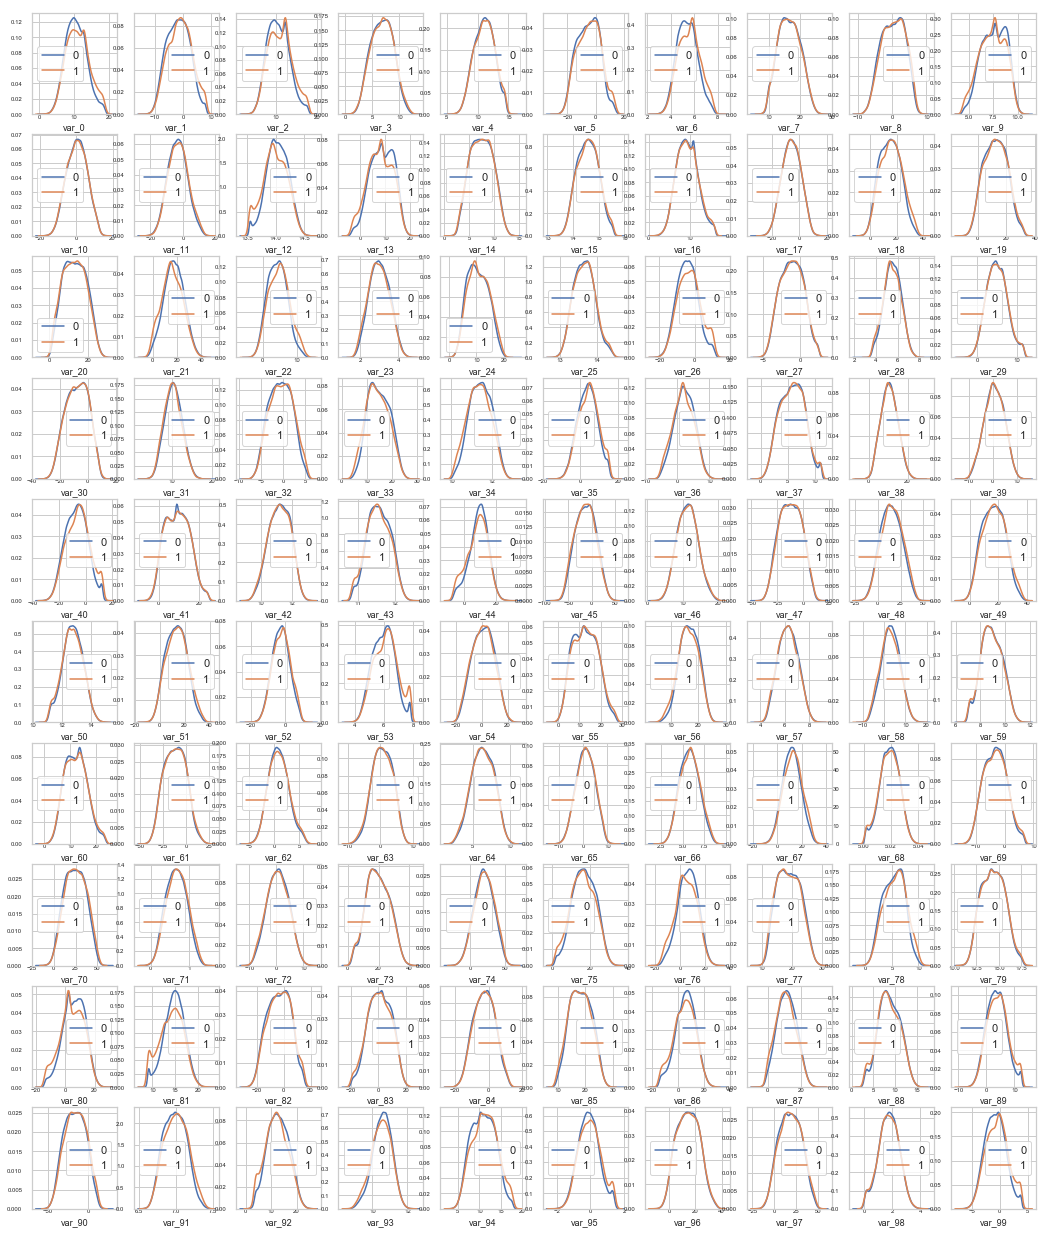

In [32]:
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]
features = df.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

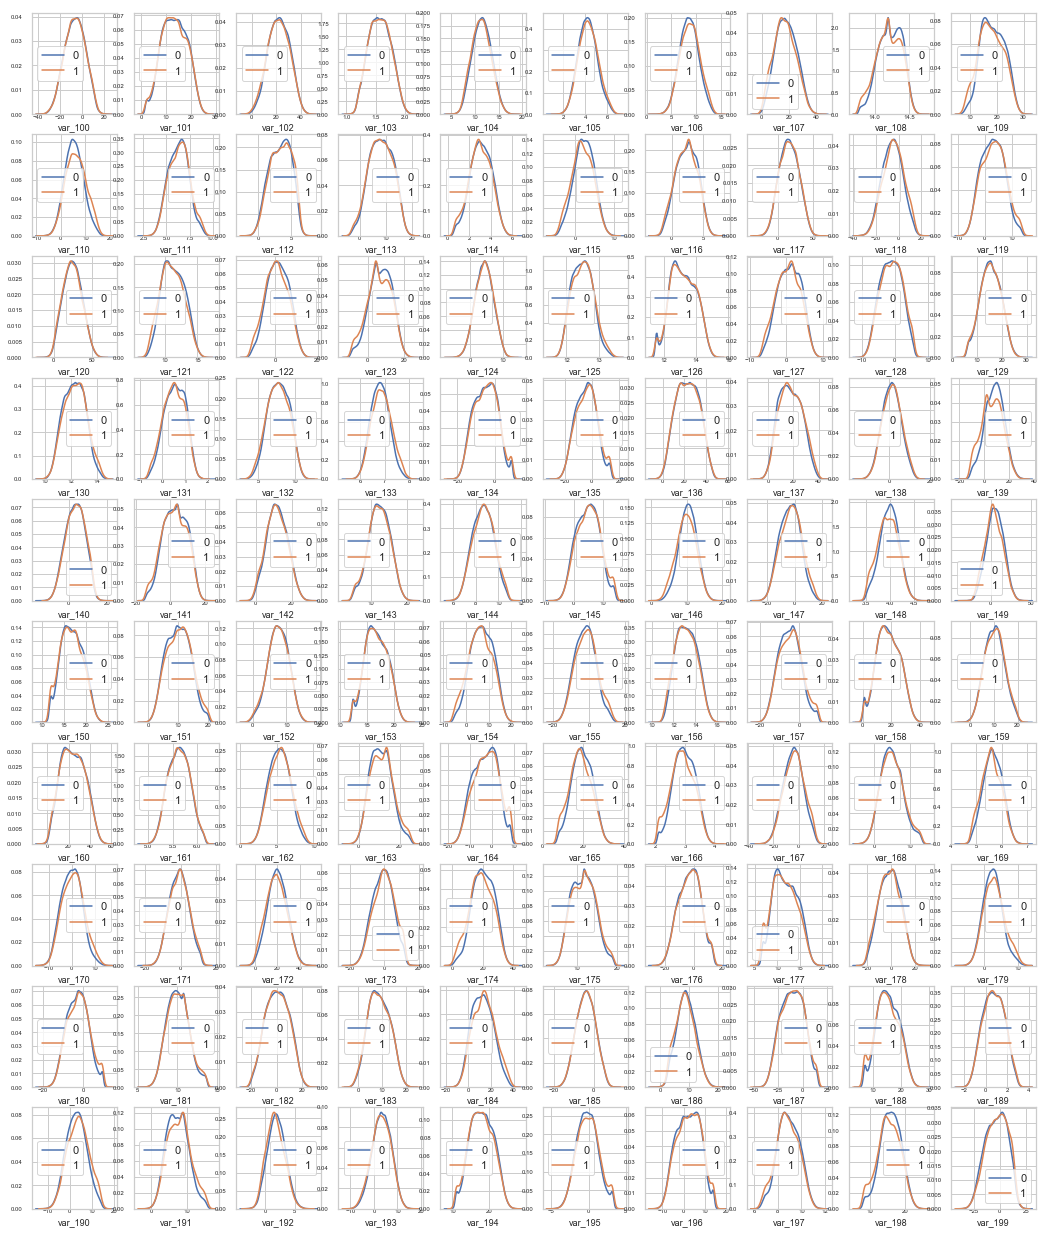

In [35]:
features = df.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

## Feature Correlation Analysis

In [44]:
#Feature correlations (top 10)
correlations = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)


,level_0,level_1,0
9890,var_193,var_172,0.008163
9891,var_172,var_193,0.008163
9892,var_162,var_127,0.008555
9893,var_127,var_162,0.008555
9894,var_122,var_132,0.008956
9895,var_132,var_122,0.008956
9896,var_146,var_169,0.009071
9897,var_169,var_146,0.009071
9898,var_183,var_189,0.009359
9899,var_189,var_183,0.009359


In [43]:
correlations.head(10)


,level_0,level_1,0
0,var_109,var_126,1.313947e-07
1,var_126,var_109,1.313947e-07
2,var_177,var_100,3.116544e-07
3,var_100,var_177,3.116544e-07
4,var_150,var_116,6.628008e-07
5,var_116,var_150,6.628008e-07
6,var_173,var_176,1.318335e-06
7,var_176,var_173,1.318335e-06
8,var_109,var_157,2.494615e-06
9,var_157,var_109,2.494615e-06


It can be observed that the correlation between the features are very small and negligible.

In [118]:
#t0 = df.loc[df['target'] == 0]
#t1 = df.loc[df['target'] == 1]
#plt.figure(figsize=(16,6))
#plt.title("Distribution of mean values per row in the train set")
#sns.distplot(t0[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 0')
#sns.distplot(t1[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 1')
#plt.legend(); plt.show()

##  PCA

To find a low-dimensional representation of the data that captures as much of
the information as possible, PCA analysis is performed. PCA is sensitive to standardization so the features are standardized before PCA is performed. In PCA we are interested in the components that maximize the variance. 

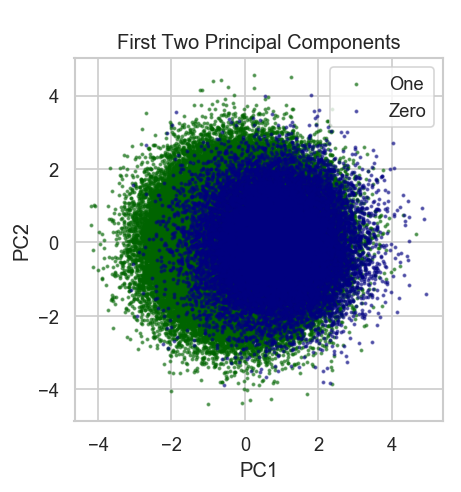

In [166]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:]
y = df.iloc[:,0]
#standardization
X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(pca, Y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='One', s=2, color='darkgreen')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Zero', s=2, color='Navy')
plt.legend()
plt.title('\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

This figure shows that when PC1 has higher values the number of Zeros increases. It also shows that a radial kernel might be helpful in finding a linear decision baoundary. 

## Train/Test Split

The dataset is randomly splitted into two categories of train and test sets. Test set is considered to have 33 percent of the whole dataset, 66'000 random observations of the original 200'000.

In [197]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=0)

In [198]:
X_train.shape

(134000, 200)

# Logistic regression 


Logistic regresssion fit is applied on the train set.

In [201]:
#Logistic fit
classifier = LogisticRegression(random_state=0,solver='lbfgs',max_iter=3000,tol=0.01)
classifier.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.01, verbose=0, warm_start=False)

Confusion matrix is shown as follows, with TP=1799, FP= 846, TN= 58455, FN= 4900.

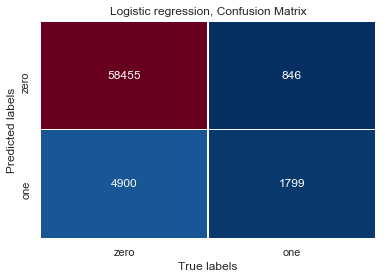

In [206]:
#prediction and confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     
Y_pred = classifier.predict(X_test)
labels = ['one', 'zero']
cm = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="RdBu_r", cbar=False ); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Logistic regression, Confusion Matrix'); 
ax.xaxis.set_ticklabels(['zero', 'one']); ax.yaxis.set_ticklabels(['zero', 'one']);

## ROC Curve

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
ROC curve is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.
(Sensitivity)True Positive Rate = True Positives / (True Positives + False Negatives)
The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.
(Specificity) = True Negatives / (True Negatives + False Positives)


AUC: 0.9


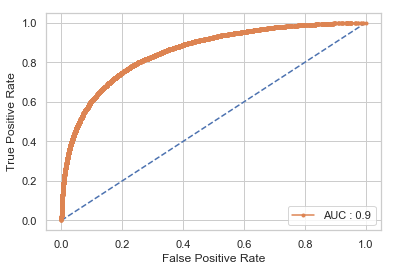

In [218]:
#AUC calculation:
from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.0.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label= "AUC : %.3f" %auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

# show the plot
pyplot.show()


In [217]:
#print('Accuracy of logistic regression classifier on test set is: {:.2f}'.format(classifier.score(X_test, Y_test)))

## Percision-Recall curve



Precision-Recall curves are used for this study, since the dataset has large class imbalance.

Precision = True Positives / (True Positives + False Positives)
Recall = True Positives / (True Positives + False Negatives)
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. 
The Percision-Recall curve for the logistic model is as follows:




f1=0.385 auc=0.502 ap=0.502


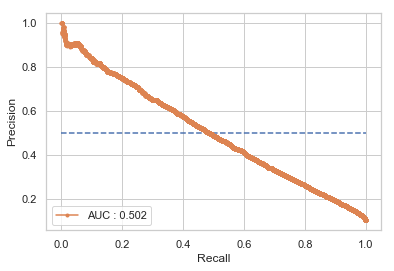

In [216]:
from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
Y_pred = classifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate F1 score
f1 = f1_score(Y_test, Y_pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(Y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label= "AUC : %.3f" %auc)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc="lower left")
# show the plot
pyplot.show()


It can be observed that although the logistic model has an acceptable accuracy in calssification of the zero values it is not doing well in calssification of the unbalanced "one" values.  
More flexible algorithm with higher degree of freedom is required to 

C:\Users\abdeetm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


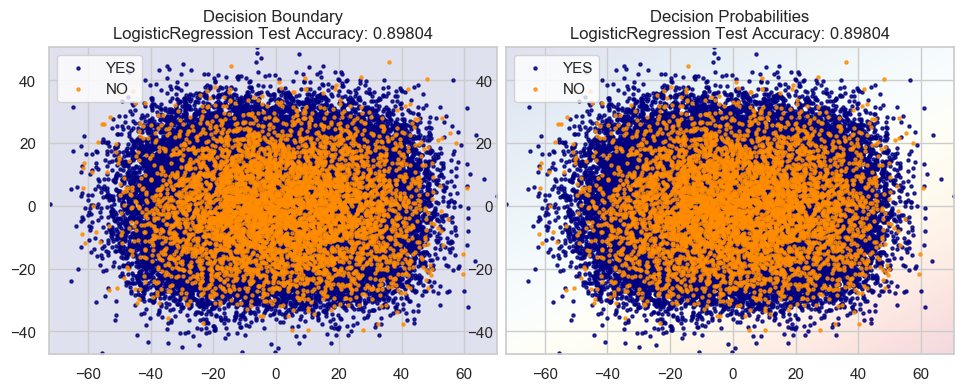

In [17]:
def plot_bank(X, Y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        plt.tight_layout()
        plt.legend()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,Y_train)
plot_bank(X_test, Y_test, model)
plt.show()

In [18]:
df_test= pd.read_csv('../data/test.csv')

In [19]:
print(df_test)

            ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
0            test_0  11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805   
1            test_1   8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117   
2            test_2   5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052   
3            test_3   8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744   
4            test_4  11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848   
5            test_5   5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761   
6            test_6   8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073   
7            test_7  17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449   
8            test_8   6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607   
9            test_9  10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018   
10          test_10   8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678   
11          test_11  10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802   

In [20]:
df_X_test = df_test.drop(columns = ['ID_code'])

In [21]:
print (df_test)

            ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
0            test_0  11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805   
1            test_1   8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117   
2            test_2   5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052   
3            test_3   8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744   
4            test_4  11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848   
5            test_5   5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761   
6            test_6   8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073   
7            test_7  17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449   
8            test_8   6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607   
9            test_9  10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018   
10          test_10   8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678   
11          test_11  10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802   

In [22]:
Y_pred = classifier.predict(df_X_test)
df_Y = pd.DataFrame(Y_pred)
df_submission = pd.merge(pd.DataFrame(df_test['ID_code']),df_Y,left_index=True,right_index=True)

In [23]:
df_submission = df_submission.rename(columns={0: 'target'})
print(df_submission)

            ID_code  target
0            test_0       0
1            test_1       0
2            test_2       0
3            test_3       0
4            test_4       0
5            test_5       0
6            test_6       0
7            test_7       0
8            test_8       0
9            test_9       0
10          test_10       0
11          test_11       0
12          test_12       0
13          test_13       0
14          test_14       0
15          test_15       0
16          test_16       0
17          test_17       0
18          test_18       0
19          test_19       0
20          test_20       0
21          test_21       0
22          test_22       0
23          test_23       0
24          test_24       0
25          test_25       0
26          test_26       0
27          test_27       0
28          test_28       0
29          test_29       0
...             ...     ...
199970  test_199970       0
199971  test_199971       0
199972  test_199972       0
199973  test_199973 

In [24]:
df_submission.to_csv('../data/submit1.csv', encoding='utf-8', index=False)

(array([193791.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   6209.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

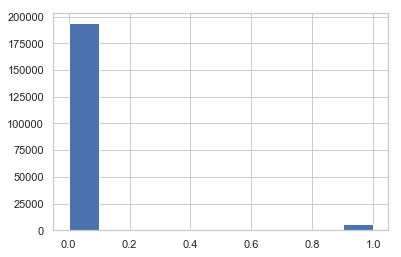

In [25]:
plt.hist(Y_pred)

(array([179902.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20098.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

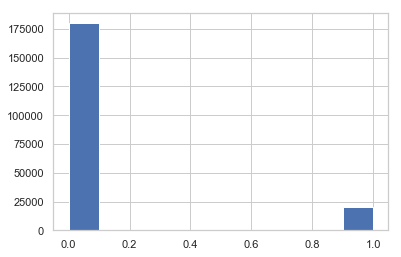

In [26]:
plt.hist(Y)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train)  

In [ ]:
Y_pred2 = svclassifier.predict(X_test)
df_Y2 = pd.DataFrame(Y_pred2)
df_submission2 = pd.merge(pd.DataFrame(df_test['ID_code']),df_Y2,left_index=True,right_index=True)
df_submission2 = df_submission2.rename(columns={0: 'target'})
df_submission2.to_csv('../data/submit2.csv', encoding='utf-8', index=False)

In [ ]:
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))  

In [ ]:
print(confusion_matrix(Y_test, Y_pred2))  
print(classification_report(Y_test, Y_pred2))  